--- DataFrame Original Carregado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


--- DataFrame Final Processado e Pronto para Machine Learning ---
   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         0       3    1 -0.565736      1      0 -0.502445       

/tmp/ipython-input-1474617478.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
/tmp/ipython-input-1474617478.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Gráfico 1 (Histograma) salvo.
Gráfico 2 (Box Plot) salvo.


/tmp/ipython-input-1474617478.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_age_filled['Age'].fillna(df_age_filled['Age'].median(), inplace=True)


Gráfico 3 (Dispersão) salvo.
Gráfico 4 (Pizza) salvo.


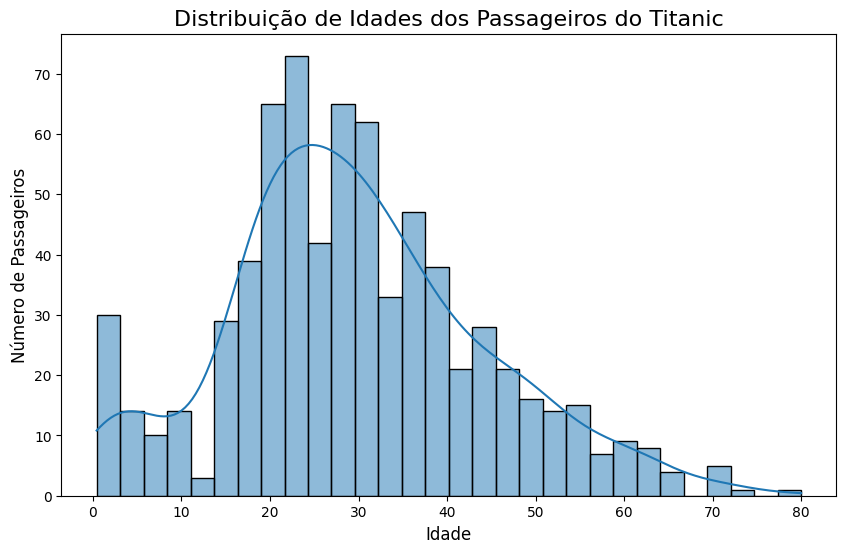

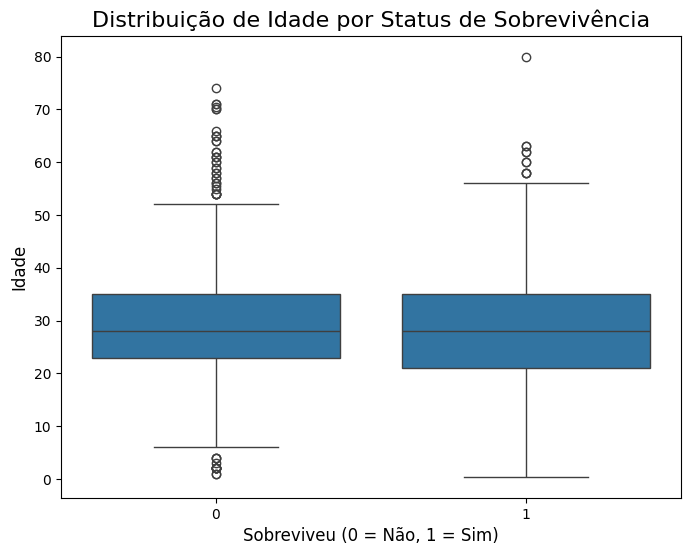

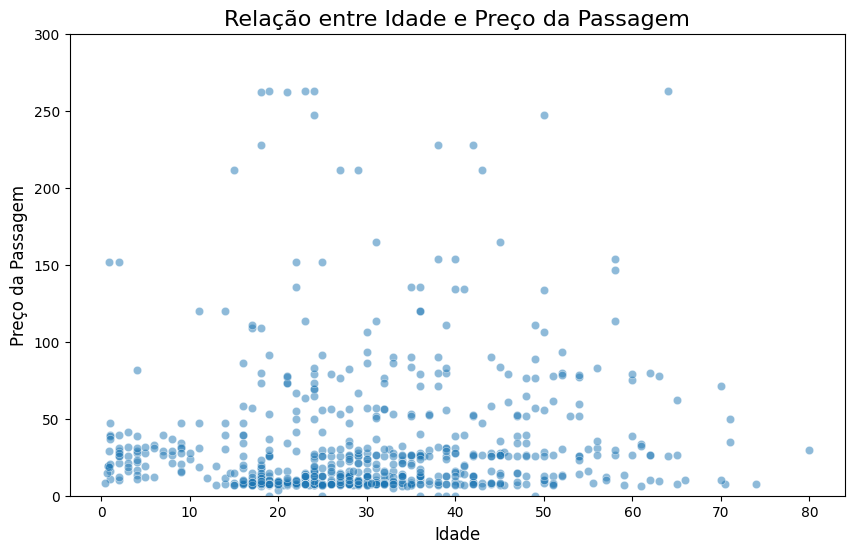

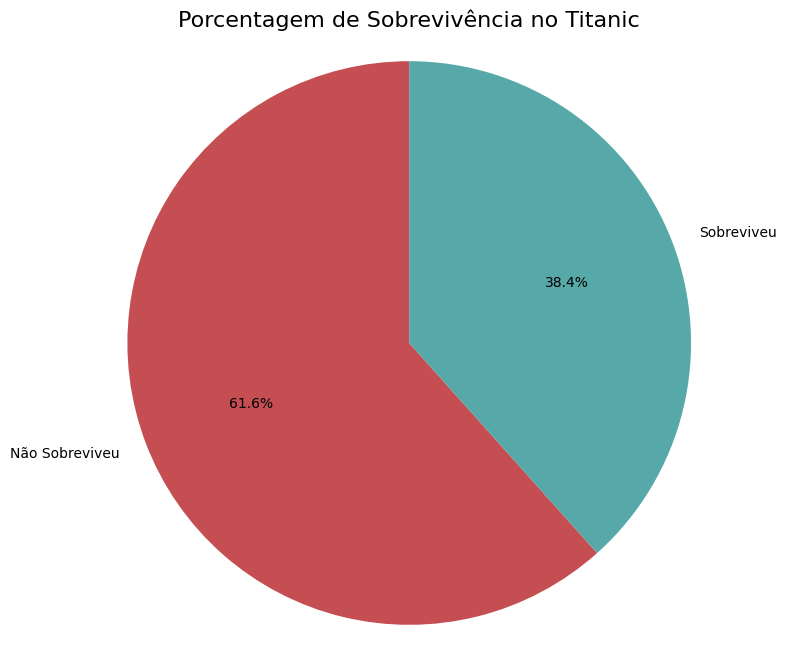

In [ ]:
# 1 IMPORTAÇÃO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 2 LIMPEZA DOS DADOS

# Conjunto de dados original
df = pd.read_csv('train.csv')
print("--- DataFrame Original Carregado ---")
print(df.info())
print("\n" + "="*50 + "\n")

# Criar uma cópia / Manter o original intacto
df_processed = df.copy()

# 2.1. Dados Ausentes
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)

# 2.2. Remoção de Coluna
# Removendo 'Cabin' (muitos valores ausentes)
df_processed.drop('Cabin', axis=1, inplace=True)
# Colunas que não serão usadas
df_processed.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# 2.3. Transformação de Dados (LabelEncoder)
le = LabelEncoder()
df_processed['Sex'] = le.fit_transform(df_processed['Sex'])
df_processed['Embarked'] = le.fit_transform(df_processed['Embarked'])

# 2.4. Padronização / Dados Numéricos (StandardScaler)
scaler = StandardScaler()
columns_to_scale = ['Age', 'Fare']
df_processed[columns_to_scale] = scaler.fit_transform(df_processed[columns_to_scale])

print("--- DataFrame Final Processado e Pronto para Machine Learning ---")
print(df_processed.head())
print("\n" + "="*50 + "\n")


# 3 VISUALIZAÇÃO DE DADOS

# 3.1. Histograma – Idades
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribuição de Idades dos Passageiros do Titanic', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)
plt.savefig('grafico_1_histograma_idades.png')
print("Gráfico 1 (Histograma) salvo.")

# 3.2. Gráfico Caixas – Idade por Sobrevivência
plt.figure(figsize=(8, 6))
df_age_filled = df.copy()
df_age_filled['Age'].fillna(df_age_filled['Age'].median(), inplace=True)
sns.boxplot(data=df_age_filled, x='Survived', y='Age')
plt.title('Distribuição de Idade por Status de Sobrevivência', fontsize=16)
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Idade', fontsize=12)
plt.savefig('grafico_2_boxplot_idade_sobrevivencia.png')
print("Gráfico 2 (Box Plot) salvo.")

# 3.3. Gráfico de Dispersão – Idade vs Passagem
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', alpha=0.5)
plt.title('Relação entre Idade e Preço da Passagem', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Preço da Passagem', fontsize=12)
plt.ylim(0, 300)
plt.savefig('grafico_3_dispersao_idade_passagem.png')
print("Gráfico 3 (Dispersão) salvo.")

# 3.4. Gráfico de Pizza – Percentual de Sobrevivência
plt.figure(figsize=(8, 8))
survival_counts = df['Survived'].value_counts()
plt.pie(survival_counts, labels=['Não Sobreviveu', 'Sobreviveu'], autopct='%1.1f%%', startangle=90, colors=['#c44e52', '#57a8a8'])
plt.title('Porcentagem de Sobrevivência no Titanic', fontsize=16)
plt.axis('equal')
plt.savefig('grafico_4_pizza_sobrevivencia.png')
print("Gráfico 4 (Pizza) salvo.")